In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import subprocess
import re
from matplotlib.colors import Normalize

In [2]:
# palya abrazolas parameterek: 1 1 1 1 3.14 3.14 0 0 100 0.001

In [3]:
df = pd.read_csv("figures/simulation_output.csv")

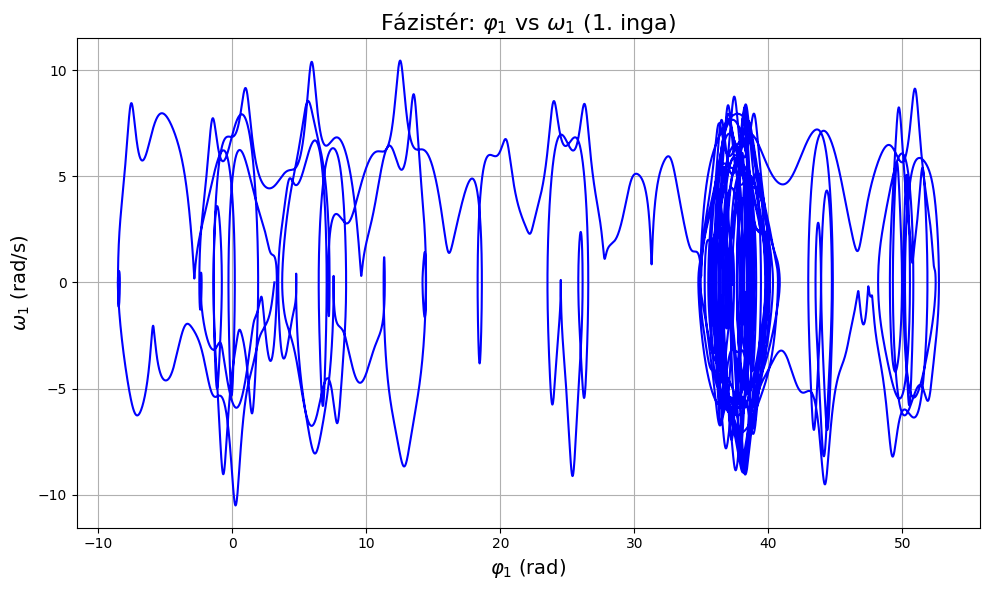

In [4]:
#első inga
plt.figure(figsize=(10, 6))
plt.plot(df['phi1'], df['omega1'], color='blue')
plt.xlabel(rf'$\varphi_1$ (rad)', fontsize=14)
plt.ylabel(rf'$\omega_1$ (rad/s)', fontsize=14)
plt.title(rf'Fázistér: $\varphi_1$ vs $\omega_1$ (1. inga)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/phi1_vs_o1")
plt.show()

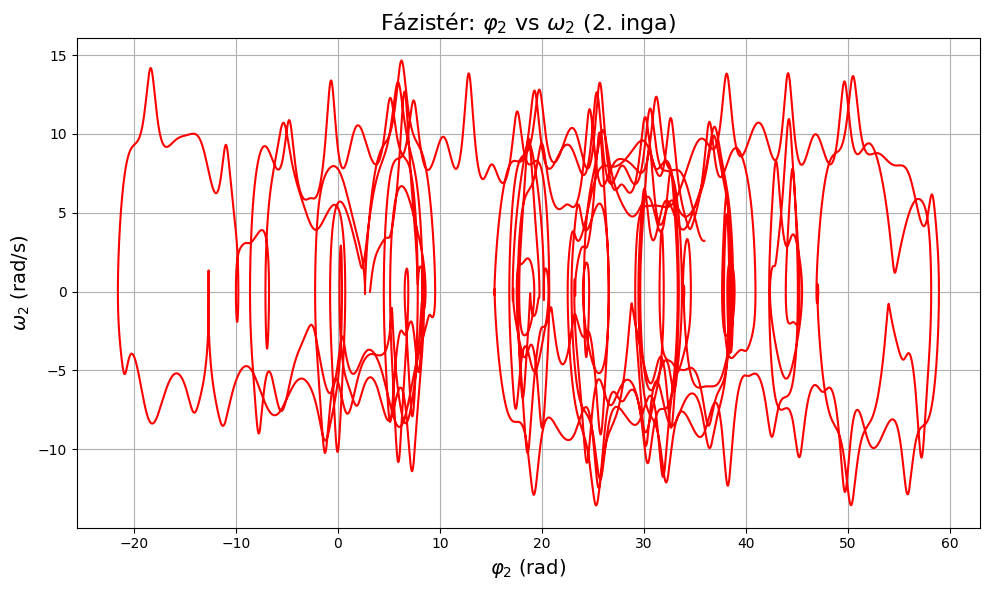

In [5]:
# 2. inga fázistere
plt.figure(figsize=(10, 6))
plt.plot(df['phi2'], df['omega2'], color='red')
plt.xlabel(rf'$\varphi_2$ (rad)', fontsize=14)
plt.ylabel(rf'$\omega_2$ (rad/s)', fontsize=14)
plt.title(rf'Fázistér: $\varphi_2$ vs $\omega_2$ (2. inga)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/phi2_vs_o2")
plt.show()


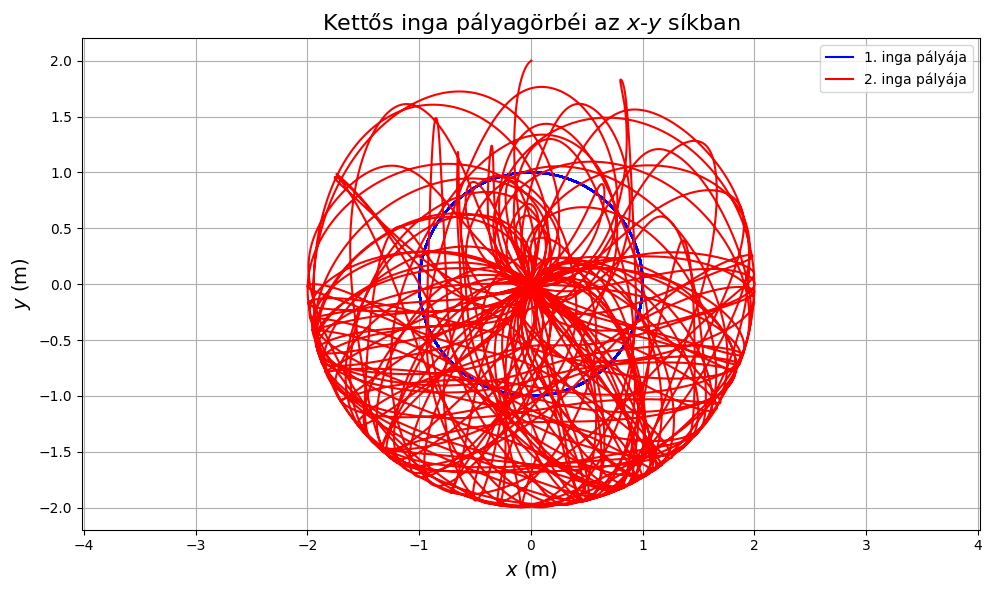

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['x1'], df['y1'], label=r'1. inga pályája', color='blue')
plt.plot(df['x2'], df['y2'], label=r'2. inga pályája', color='red')

plt.xlabel(r'$x$ (m)', fontsize=14)
plt.ylabel(r'$y$ (m)', fontsize=14)
plt.title(r'Kettős inga pályagörbéi az $x$-$y$ síkban', fontsize=16)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.axis('equal')  # hogy jobban lássuk, arányosan
plt.savefig("figures/x-y")
plt.show()


In [7]:
results1 = []
results2 = []

angs = np.linspace(0,2*np.pi, 100)
for angle in angs:
    phi1 =angle 
    phi2 =angle
    cmd = [r".\build\Debug\pendulum_app.exe", "flip_single", "1", "1", "1", "1", f"{phi1}", f"{phi2}", "0", "0", "100", "0.001", "1"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    match = re.search(r"First flip time \(phi1\):\s*(-?[0-9.]+)", result.stdout)
    if match:
        number = float(match.group(1))
        results1.append(number)
    else:
        print("Nem találtam a kimenetben a várt sort.")

for angle in angs:
    phi1 =angle 
    phi2 =angle
    cmd = [r".\build\Debug\pendulum_app.exe", "flip_single", "1", "1", "1", "1", f"{phi1}", f"{phi2}", "0", "0", "100", "0.001", "0"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    match = re.search(r"First flip time \(phi2\):\s*(-?[0-9.]+)", result.stdout)
    if match:
        number = float(match.group(1))
        results2.append(number)
    else:
        print("Nem találtam a kimenetben a várt sort.")





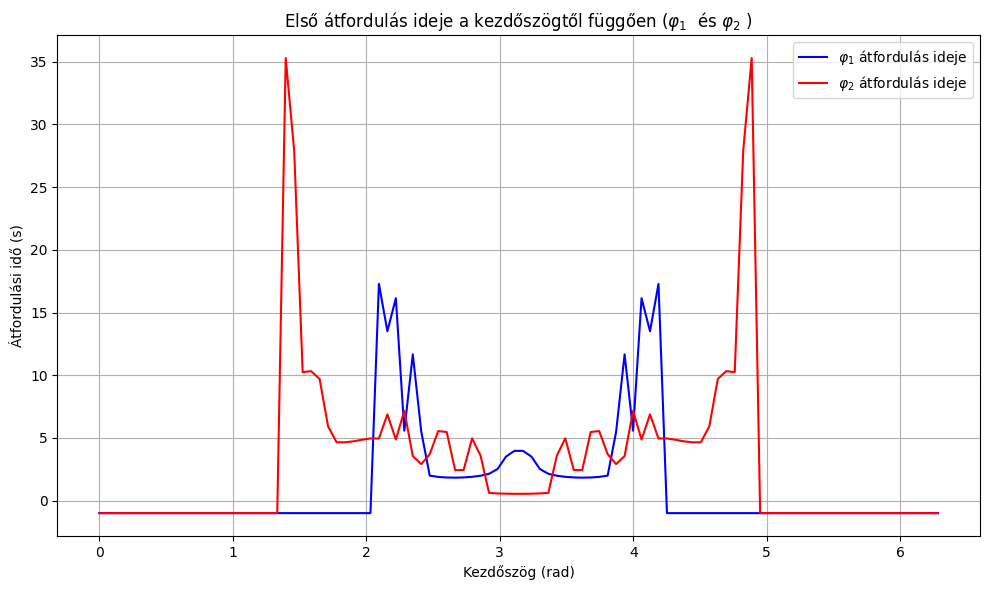

In [8]:
plt.figure(figsize=(10,6))
plt.plot(angs, results1, color="blue", label=rf'$\varphi_1$ átfordulás ideje')
plt.plot(angs, results2, color="red", label=rf'$\varphi_2$ átfordulás ideje')
plt.xlabel('Kezdőszög (rad)')
plt.ylabel('Átfordulási idő (s)')
plt.title(rf'Első átfordulás ideje a kezdőszögtől függően ($\varphi_1$  és $\varphi_2$ )')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/0-2pi-fft")
plt.show()

In [9]:
results11 = []
results22 = []

angs = np.linspace(0,3.1, 1000)
for angle in angs:
    phi1 =angle 
    phi2 =angle
    cmd = [r".\build\Debug\pendulum_app.exe", "flip_single", "1", "1", "1", "1", f"{phi1}", f"{phi2}", "0", "0", "100", "0.001", "1"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    match = re.search(r"First flip time \(phi1\):\s*(-?[0-9.]+)", result.stdout)
    if match:
        number = float(match.group(1))
        results11.append(number)
    else:
        print("Nem találtam a kimenetben a várt sort.")

for angle in angs:
    phi1 =angle 
    phi2 =angle
    cmd = [r".\build\Debug\pendulum_app.exe", "flip_single", "1", "1", "1", "1", f"{phi1}", f"{phi2}", "0", "0", "100", "0.001", "0"]
    result = subprocess.run(cmd, capture_output=True, text=True)
    match = re.search(r"First flip time \(phi2\):\s*(-?[0-9.]+)", result.stdout)
    if match:
        number = float(match.group(1))
        results22.append(number)
    else:
        print("Nem találtam a kimenetben a várt sort.")





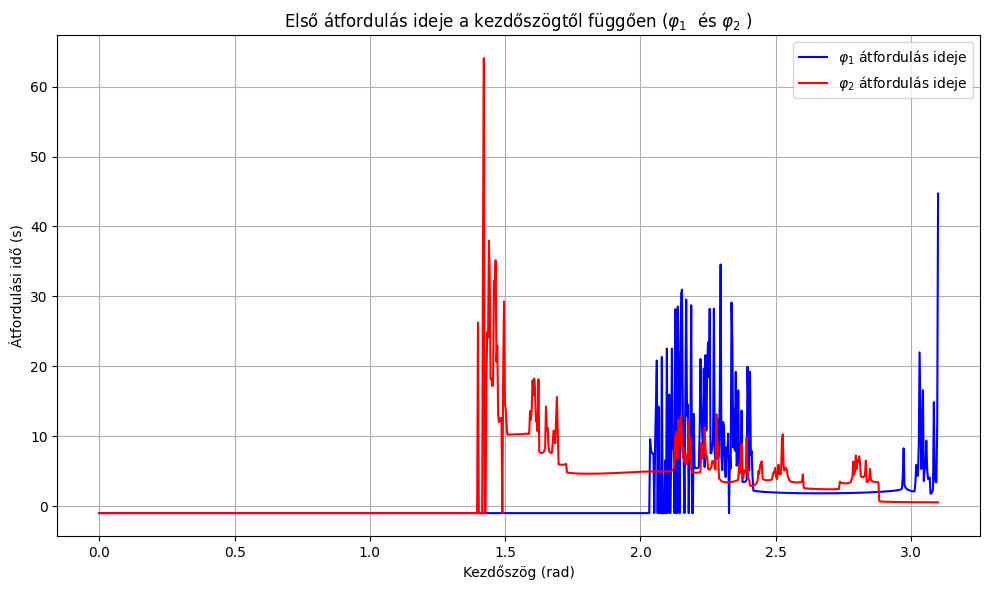

In [10]:
plt.figure(figsize=(10,6))
plt.plot(angs, results11, color="blue", label=rf'$\varphi_1$ átfordulás ideje')
plt.plot(angs, results22, color="red", label=rf'$\varphi_2$ átfordulás ideje')
plt.xlabel('Kezdőszög (rad)')
plt.ylabel('Átfordulási idő (s)')
plt.title(rf'Első átfordulás ideje a kezdőszögtől függően ($\varphi_1$  és $\varphi_2$ )')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/0-3_1-fft")
plt.show()

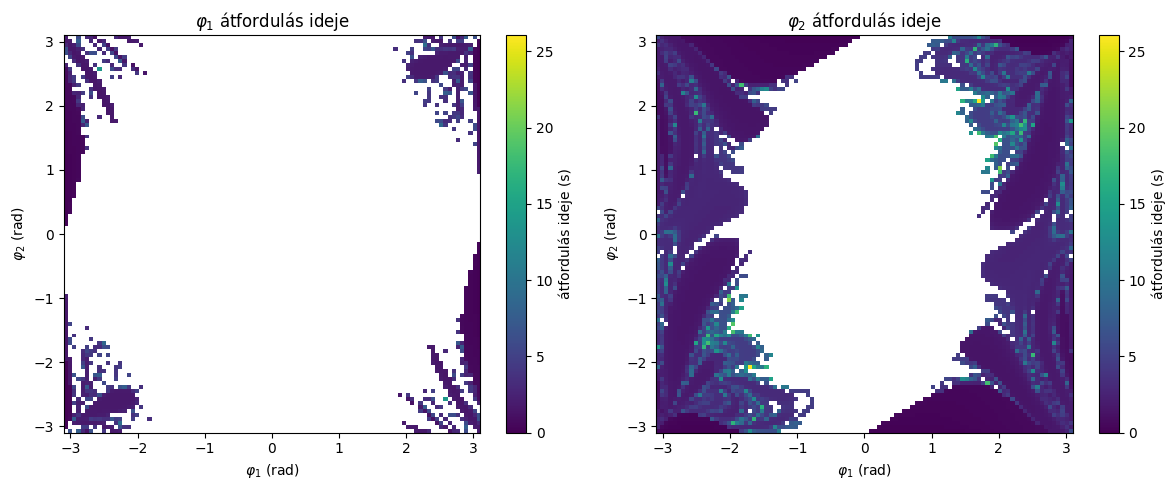

In [13]:
# CSV fájlok betöltése
df1 = pd.read_csv("figures/phi1_flip_l1_1_l2_1_m1_1_m2_1_o1_0_o2_0_T_30_h_0.01_phi_-3.1_to_3.1_res_100.csv")
df2 = pd.read_csv("figures/phi2_flip_l1_1_l2_1_m1_1_m2_1_o1_0_o2_0_T_30_h_0.01_phi_-3.1_to_3.1_res_100.csv")

# -1 értékeket NaN-ra cseréljük
# -1 értékek lecserélése NaN-ra
df1['flip_time'] = df1['flip_time'].replace(-1, np.nan)
df2['flip_time'] = df2['flip_time'].replace(-1, np.nan)

# Pivot táblák
pivot1 = df1.pivot(index="phi2", columns="phi1", values="flip_time")
pivot2 = df2.pivot(index="phi2", columns="phi1", values="flip_time")

# Adatok
data1 = pivot1.values
data2 = pivot2.values

# Tengelyek tartománya
phi_min, phi_max = -3.1, 3.1
extent = [phi_min, phi_max, phi_min, phi_max]

# Közös színskála normalizálása
vmax = np.nanmax([np.nanmax(data1), np.nanmax(data2)])
norm = Normalize(vmin=0, vmax=vmax)

# Ábrázolás
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

im1 = axs[0].imshow(data1, cmap='viridis', aspect='auto', origin='lower',
                    norm=norm, extent=extent)
axs[0].set_title(r'$\varphi_1$ átfordulás ideje')
axs[0].set_xlabel(r'$\varphi_1$ (rad)')
axs[0].set_ylabel(r'$\varphi_2$ (rad)')
fig.colorbar(im1, ax=axs[0], label='átfordulás ideje (s)')

im2 = axs[1].imshow(data2, cmap='viridis', aspect='auto', origin='lower',
                    norm=norm, extent=extent)
axs[1].set_title(r'$\varphi_2$ átfordulás ideje')
axs[1].set_xlabel(r'$\varphi_1$ (rad)')
axs[1].set_ylabel(r'$\varphi_2$ (rad)')
fig.colorbar(im2, ax=axs[1], label='átfordulás ideje (s)')

plt.tight_layout()
plt.savefig("figures/atf-30_01_100.png")
plt.show()


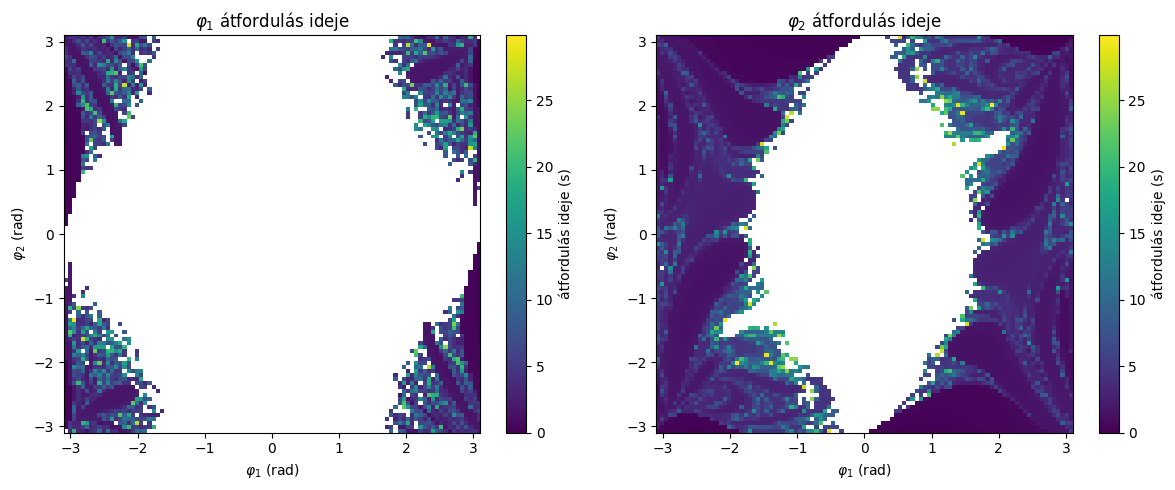

In [14]:
# CSV fájlok betöltése
df1 = pd.read_csv("figures/phi1_flip_l1_1_l2_1_m1_1_m2_1_o1_0_o2_0_T_30_h_0.001_phi_-3.1_to_3.1_res_100.csv")
df2 = pd.read_csv("figures/phi2_flip_l1_1_l2_1_m1_1_m2_1_o1_0_o2_0_T_30_h_0.001_phi_-3.1_to_3.1_res_100.csv")

# -1 értékeket NaN-ra cseréljük
# -1 értékek lecserélése NaN-ra
df1['flip_time'] = df1['flip_time'].replace(-1, np.nan)
df2['flip_time'] = df2['flip_time'].replace(-1, np.nan)

# Pivot táblák
pivot1 = df1.pivot(index="phi2", columns="phi1", values="flip_time")
pivot2 = df2.pivot(index="phi2", columns="phi1", values="flip_time")

# Adatok
data1 = pivot1.values
data2 = pivot2.values

# Tengelyek tartománya
phi_min, phi_max = -3.1, 3.1
extent = [phi_min, phi_max, phi_min, phi_max]

# Közös színskála normalizálása
vmax = np.nanmax([np.nanmax(data1), np.nanmax(data2)])
norm = Normalize(vmin=0, vmax=vmax)

# Ábrázolás
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

im1 = axs[0].imshow(data1, cmap='viridis', aspect='auto', origin='lower',
                    norm=norm, extent=extent)
axs[0].set_title(r'$\varphi_1$ átfordulás ideje')
axs[0].set_xlabel(r'$\varphi_1$ (rad)')
axs[0].set_ylabel(r'$\varphi_2$ (rad)')
fig.colorbar(im1, ax=axs[0], label='átfordulás ideje (s)')

im2 = axs[1].imshow(data2, cmap='viridis', aspect='auto', origin='lower',
                    norm=norm, extent=extent)
axs[1].set_title(r'$\varphi_2$ átfordulás ideje')
axs[1].set_xlabel(r'$\varphi_1$ (rad)')
axs[1].set_ylabel(r'$\varphi_2$ (rad)')
fig.colorbar(im2, ax=axs[1], label='átfordulás ideje (s)')

plt.tight_layout()
plt.savefig("figures/atf-30_001_100.png")
plt.show()


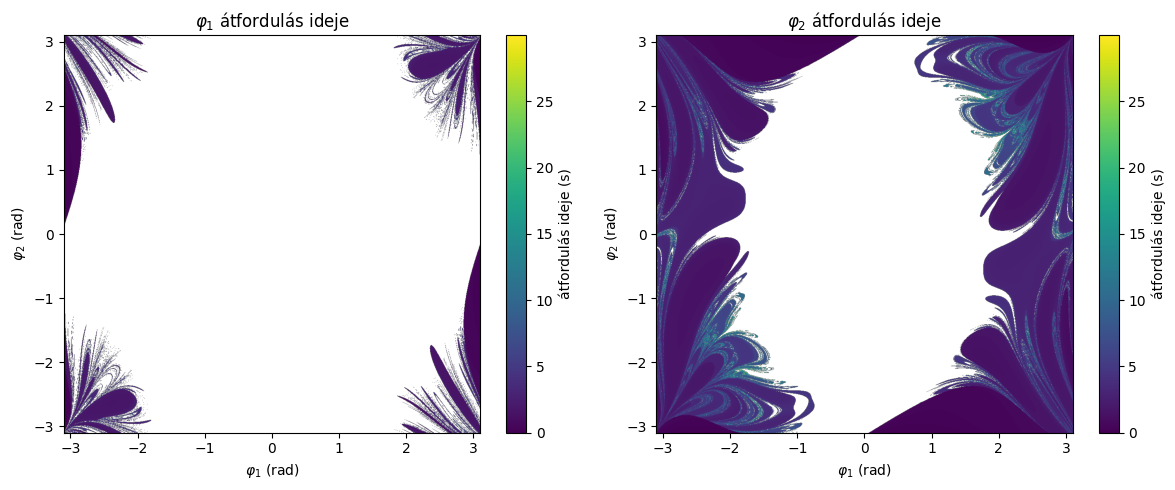

In [15]:
# CSV fájlok betöltése
df1 = pd.read_csv("figures/phi1_flip_l1_1_l2_1_m1_1_m2_1_o1_0_o2_0_T_30_h_0.01_phi_-3.1_to_3.1_res_1000.csv")
df2 = pd.read_csv("figures/phi2_flip_l1_1_l2_1_m1_1_m2_1_o1_0_o2_0_T_30_h_0.01_phi_-3.1_to_3.1_res_1000.csv")

# -1 értékeket NaN-ra cseréljük
# -1 értékek lecserélése NaN-ra
df1['flip_time'] = df1['flip_time'].replace(-1, np.nan)
df2['flip_time'] = df2['flip_time'].replace(-1, np.nan)

# Pivot táblák
pivot1 = df1.pivot(index="phi2", columns="phi1", values="flip_time")
pivot2 = df2.pivot(index="phi2", columns="phi1", values="flip_time")

# Adatok
data1 = pivot1.values
data2 = pivot2.values

# Tengelyek tartománya
phi_min, phi_max = -3.1, 3.1
extent = [phi_min, phi_max, phi_min, phi_max]

# Közös színskála normalizálása
vmax = np.nanmax([np.nanmax(data1), np.nanmax(data2)])
norm = Normalize(vmin=0, vmax=vmax)

# Ábrázolás
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

im1 = axs[0].imshow(data1, cmap='viridis', aspect='auto', origin='lower',
                    norm=norm, extent=extent)
axs[0].set_title(r'$\varphi_1$ átfordulás ideje')
axs[0].set_xlabel(r'$\varphi_1$ (rad)')
axs[0].set_ylabel(r'$\varphi_2$ (rad)')
fig.colorbar(im1, ax=axs[0], label='átfordulás ideje (s)')

im2 = axs[1].imshow(data2, cmap='viridis', aspect='auto', origin='lower',
                    norm=norm, extent=extent)
axs[1].set_title(r'$\varphi_2$ átfordulás ideje')
axs[1].set_xlabel(r'$\varphi_1$ (rad)')
axs[1].set_ylabel(r'$\varphi_2$ (rad)')
fig.colorbar(im2, ax=axs[1], label='átfordulás ideje (s)')

plt.tight_layout()
plt.savefig("figures/atf-30_01_1000.png")
plt.show()
